Issue 1 - Auto Fuel Economy
You can access the U.S. ofﬁcial fuel economy for vehicles sold in U.S. at: 
https://fueleconomy.gov/feg/download.shtml

You are to investigate the the fuel economy for vehicles using gasoline from the years 2000 to 2019. We are interested in the vehicles sold be the companies General Motors, Ford, Chrysler, Honda and Toyota. Note that some companies like GM and Chrysler have sub-brands. For example Cadillac and Chevrolet are GM products. The U.S. government reports MPG (miles per gallon) in three way: city, highway and combined. We are only interested in combined MPG.

1. For each company collect the MPG sold by each company in the years 2000-2019. Produce the box plots per company for the MPG over those years. How do the companies compare?

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy as scipy

In [2]:
##Path for issue 1
MPG_Vehicles_CSV = './vehicles.csv'

In [3]:
def extractdataByyear(Year):
    cols =['year','make','comb08','fuelType'] #Columns which need
    All_df = pd.read_csv(MPG_Vehicles_CSV,usecols =cols)
    year_df = All_df.loc[All_df['year'].isin([Year])]
    year_df = year_df[cols] #Swap the order, Year make comb
    year_df = year_df.loc[year_df['fuelType'].isin(['Regular','Premium','Midgrade'])] 
    return year_df

In [4]:
def ConvertTheType(df):
    df['Year'] = df['Year'].astype('int64') 
    df['mpg'] = df['mpg'].astype('float64') 
#     return df

In [5]:
def RenameBrand(df):
    df = df.apply(lambda x: x.astype(str).str.upper())
    df = df.replace('FOMOCO','FORD')
    df = df.replace('Honda','HONDA')
    df = df.replace('Toyota','TOYOTA')
    
    df = df.replace('GM','General Motors')
    df = df.replace('CHEVROLET','General Motors')
    df = df.replace('GMC','General Motors')
    df = df.replace('Cadillac','General Motors')
    df = df.replace('BUICK','General Motors')
    
    df = df.replace('Chrysler Group LLC','Chrysler')
    df = df.replace('CHEVROLET','Chrysler')
    df = df.replace('DODGE','Chrysler')
    df = df.replace('JEEP','Chrysler')
    return df

In [6]:
def extractbrandfromdf(dfs,brandName):
    cols = ['Year','MfrName','mpg','fuelType']
    brand_df = pd.DataFrame(columns=cols)
    for index in range(len(dfs)):
        dfs[index].columns = cols
        brand_df = pd.concat([brand_df,dfs[index].loc[dfs[index]['MfrName'].isin([brandName])]])
#         brand_df = df.loc[df['MfrName'].isin([brandName])]
    return brand_df

In [7]:
def confidence_interval(series, sample_size,confidence=0.95):
    mean = series.mean()
    std = series.std()
    sem = np.divide(std, np.sqrt(sample_size))
    z = scipy.stats.t.ppf((1 + confidence)/2,sample_size)
    return (mean - z*sem, mean, mean + z*sem)

In [8]:
def confidenceinterval_propotion(series, sample_size,probability,confidence=0.95):
    # mean =0.0093
    pandoneminusp =[probability, 1- probability]
    mean = series.mean()
    sem = np.sqrt( np.divide(pandoneminusp[0]*pandoneminusp[1], sample_size ) )
    z = scipy.stats.t.ppf((1 + confidence)/2,sample_size)
    return mean - z*sem, mean, mean + z*sem

In [9]:
#Get the requirement
all_df = []
for year in range(2000,2020):
    year_df = extractdataByyear(year)
    year_df = RenameBrand(year_df)
    all_df.append(year_df)

In [27]:
gm_all_df = extractbrandfromdf(all_df,'General Motors')
ford_all_df = extractbrandfromdf(all_df,'FORD')
chrysler_all_df = extractbrandfromdf(all_df,'Chrysler')
honda_all_df = extractbrandfromdf(all_df,'HONDA')
toyota_all_df = extractbrandfromdf(all_df,'TOYOTA')

ConvertTheType(gm_all_df)
ConvertTheType(ford_all_df)
ConvertTheType(chrysler_all_df)
ConvertTheType(honda_all_df)
ConvertTheType(toyota_all_df)

brand_df_list = [gm_all_df,ford_all_df,chrysler_all_df,honda_all_df,toyota_all_df]
brand_list = ['General Motors', 'FORD', 'Chrysler', 'HONDA' , 'TOYOTA']

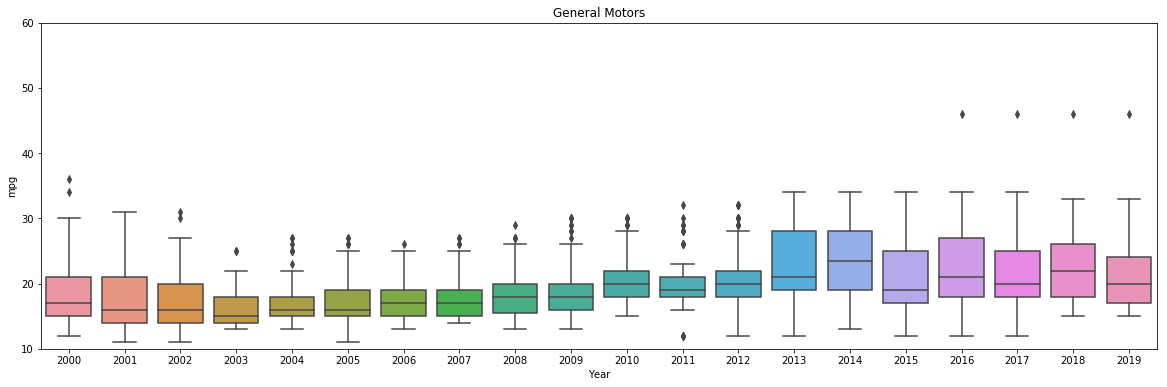

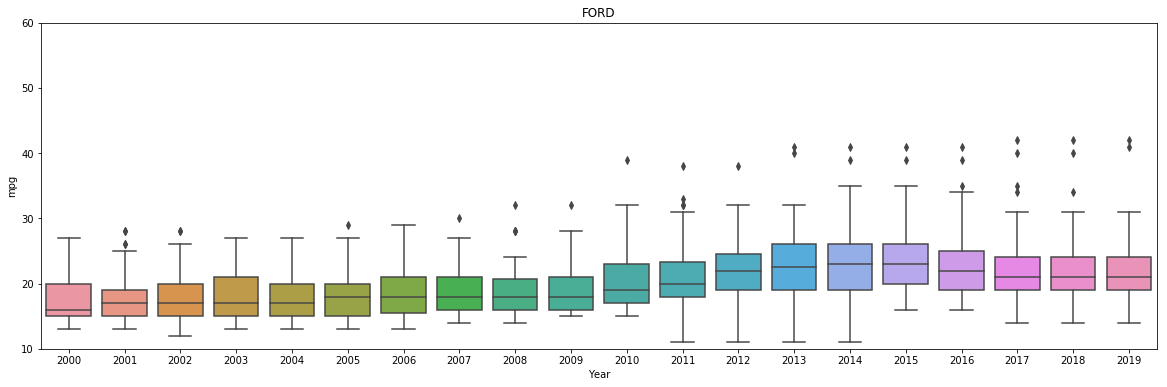

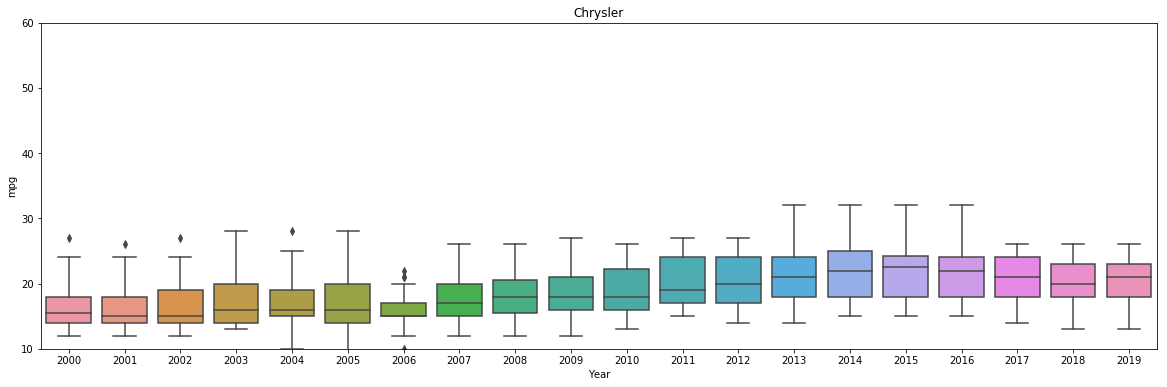

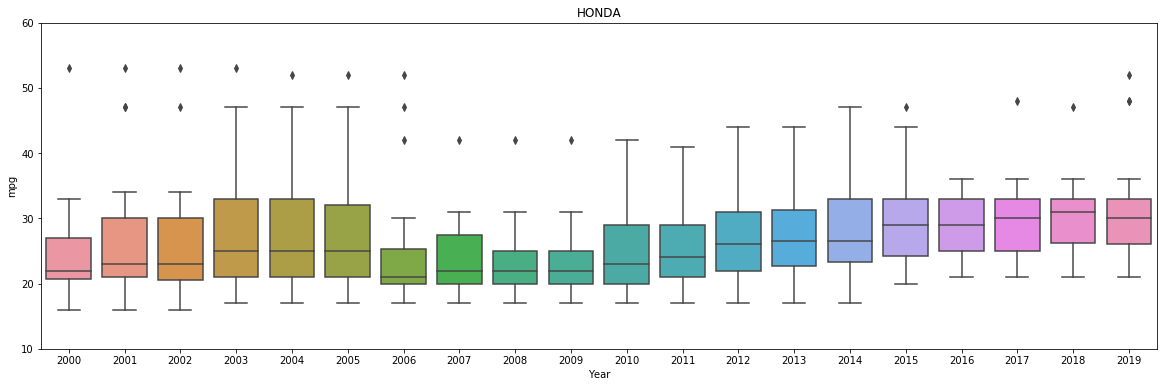

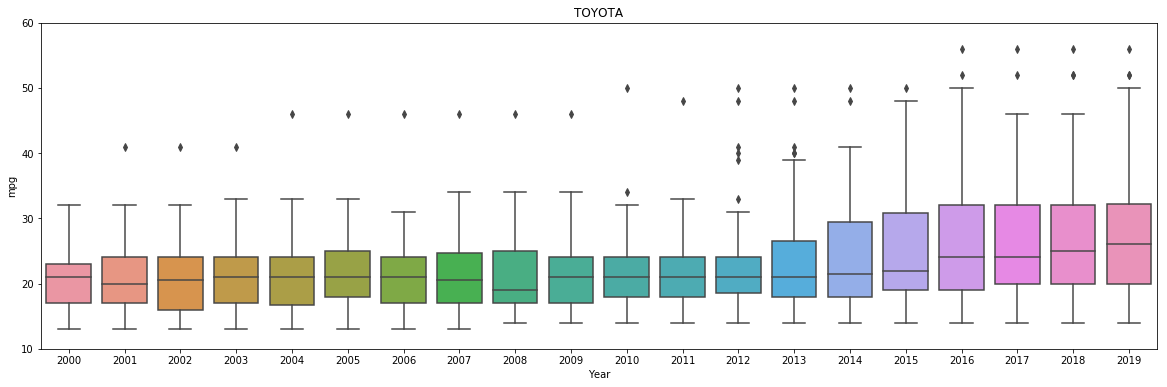

In [11]:
for abrand_df in brand_df_list:
    brand_name = abrand_df.iloc[0]['MfrName']
    plt.figure(figsize=(20,6))
    plt.ylim(10, 60)
    sns.boxplot(x="Year", y="mpg",data= abrand_df).set_title(brand_name)

1(Boxplot). Ans:
The trend of mpg is towards being higher.

Chrysler keep their variance between each vehicle less different. The variance of mpg of FORD, GM and Toyota are bigger and bigger. Toyota has the widest box in five companies since 2016. Honda has two peaks of variance in 2004 and 2014. Recently year, Honda reduce the difference between each vehicle.
Though all of the medians of mpg are going up in 2019, FORD, Chrysler, GM and Toyota still have high chance to buy a vehicle whose mpg is similar to 2000. 

Nowadays, if you want to buy a new car with less risk, then Honda is the best choice. Moreover, we have reasonable confidence that Honda mpg is better than before. 

2. Plot the yearly mean in the years 2000- 2019 with conﬁdence interval of the mpg for each company. That is for each company compute the mean mpg over all vehicles sold by that company per year. What changes have there been in those years? How do the companies compare?

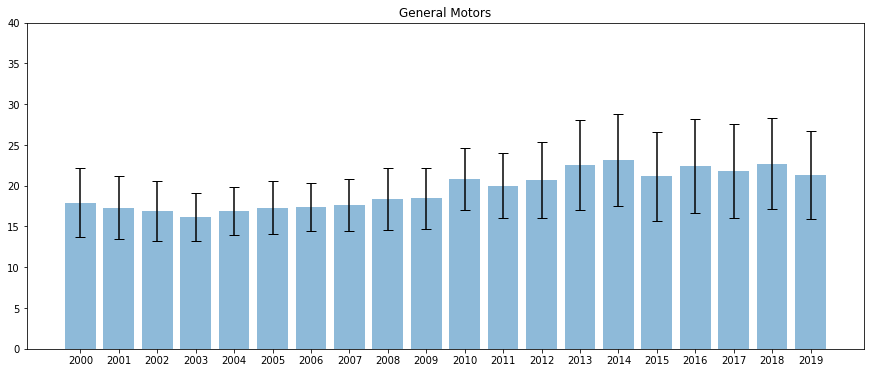

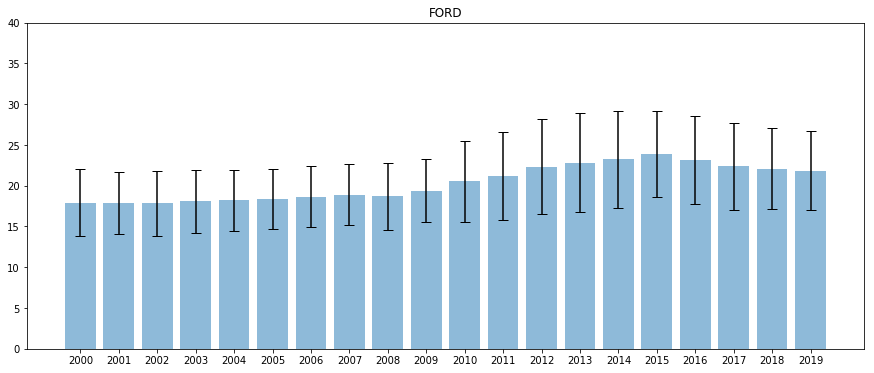

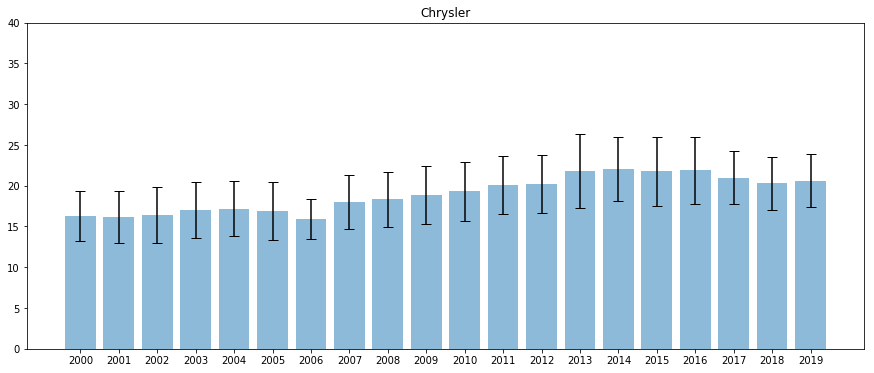

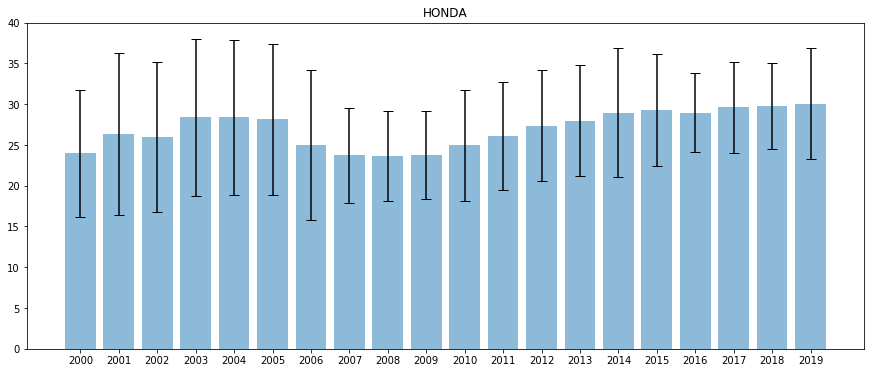

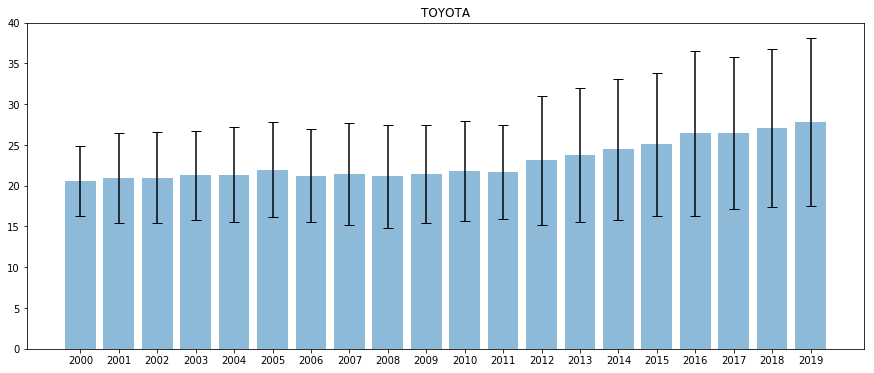

In [12]:
for abrand_df in brand_df_list:
    year_list = abrand_df['Year'].unique()
    brand_name = abrand_df.iloc[0]['MfrName']
    xticks = np.arange(len(year_list))
    
    #Yearly mean
    yearly_mean = abrand_df.groupby('Year').mean().reset_index()
    yearly_mean = yearly_mean['mpg']

    #sem
    yearly_sem  = abrand_df.groupby('Year').std().reset_index()
    yearly_sem = yearly_sem['mpg']
    
    fig, ax = plt.subplots(figsize=(15, 6))
    plt.ylim([0,40])
    ax.bar(x=year_list, height=yearly_mean, yerr = yearly_sem, alpha = 0.5, capsize=5)
    ax.set_title(brand_name)
    ax.set_xticks(year_list)
    ax.set_xticklabels(year_list)
plt.show()

2(Mean fuel efficiency). Ans:
Most of companies gradually upgrade their aberage of mpg duing this 20 years except Honda. Also, the distribution is going wider, but Chrysler and Honda.
Honda has two peaks in 2004 and 2019. It's a issue which is worth deep researching. This plot shows that Honda tries to reduce the difference between each vehicle. Chrysle stabilizes their quality of each vehicle. Though there are higher variance in 2013 to 2016, Chrysle gtt back its level in 2017. Toyota improves the average of mpg most of year, but the difference between each vehicle increases. It shows that the quality of vehicles of Toyota might be not stable.
Using average of mpg shows Honda's vehicles have better fuel efficiency.

3. Plot the mpg for each company per year of their most fuel efﬁcient vehicle each year. What changes have there been in those years? How do the companies compare?

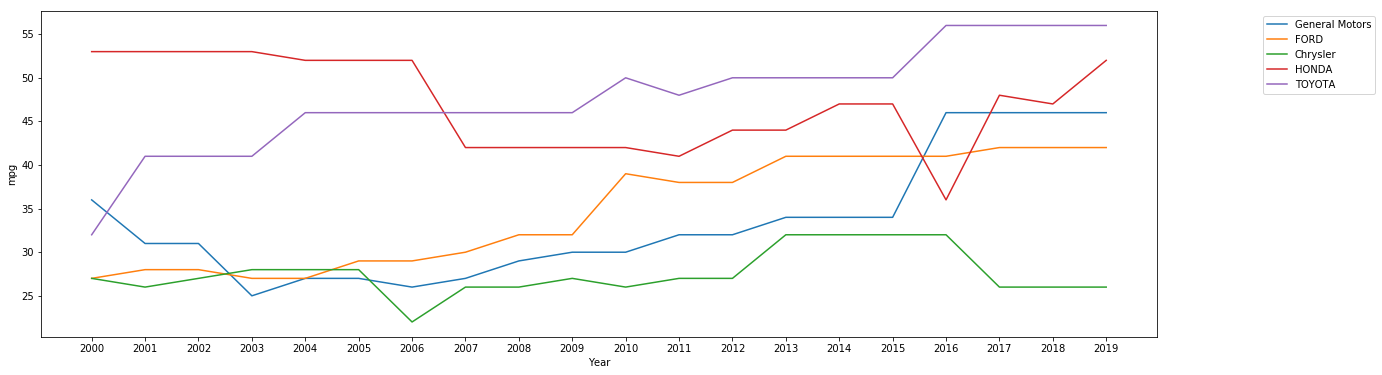

In [13]:
fig, ax = plt.subplots()
for abrand_df in brand_df_list:
    #Which brand
    brand_name = abrand_df.iloc[0]['MfrName']
    #Yearly max
    yearly_max = abrand_df.groupby('Year').max().reset_index()

    ax = yearly_max.plot(ax=ax, kind='line', x='Year', y='mpg',figsize=(20,6), label=brand_name)
    ax.set_ylabel("mpg")
    ax.legend(loc='upper right',bbox_to_anchor=(1.2, 1))
    ax.set_xticks(range(2000,2020))
plt.show()

3(most fuel efficiency). Ans:
Honda had the best mpg vehicle until 2007. Toyota has the best mpg vehicle since 2007. The graph shows that must of companies try to make a better fuel eddiciency every year, except Chrysler and Honda. Honda dropped in 2007 and dropped again in 2016. AFter that, Honda tried to catch up their best mpg. Chrysler's best mpg is stabler than other companies. In 2019, the best mpg is similiar to 2000.

The first 17 years of this term, Honda doesn't focus on researching how to drive farther per gallon. Recently, Honda try to catch up Toyota about this issue. Obviously, keeping improving the fuel efficiency is not a goal for Chrysler. Perhaps Chrysler put more effort in other part of vehicle. 

In [14]:
##Path for issue 2
causes_of_death_path = './assignment2Data/causes_of_death.csv'
framingham_path = './assignment2Data/framingham.csv'

In [15]:
#dataframe for issue 2 Diet and Death
causeofdeath_df = pd.read_csv(causes_of_death_path)
framingham_df = pd.read_csv(framingham_path)

In [16]:
disease_list = causeofdeath_df['Cause'].unique()

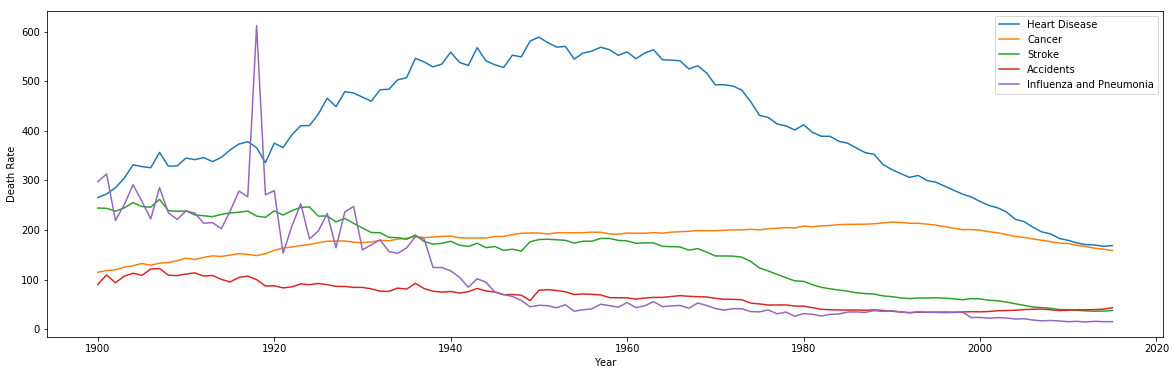

In [17]:
all_diseases = pd.DataFrame(columns=causeofdeath_df.columns)
fig, ax = plt.subplots()
for disease in disease_list:
    a_df = causeofdeath_df.loc[causeofdeath_df['Cause'].isin([disease])]
    ax = a_df.plot(ax=ax, kind='line', x='Year', y='Age Adjusted Death Rate',figsize=(20,6), label=disease)
    ax.set_ylabel("Death Rate")
plt.show()

4. What is the percentage of people in the study that have diabetes?

In [18]:
have_diabetes_df = framingham_df[framingham_df['DIABETES'].isin(['1'])]
'{:.2%}'.format(have_diabetes_df['DIABETES'].count()/framingham_df['DIABETES'].count())

'2.73%'

Now we need to compare this to the general population. Either a person is diagnosed as having diabetes or not. We can use the multinomial distribution to generate a sample of two values. Say we have an event that has .75 probability of occurring. Then the following will count the number of times the event does not occur and not occur in a sample of 1000.
two_value_probabilities = [0.25, 0.75]
sample_size = 1000
np.random.multinomial(sample_size, two_value_probabilities)
Using this we can compute the number of people we would expect to have diabetes in a sample of 5,000, which we need to convert to a percentage. Now do this 200 times.

5. Produce the histogram of the percent of people in your 200 samples with diabetes.

In [19]:
two_value_probabilities = [0.093, 0.907]
sample_size = 5000
np.random.multinomial(sample_size, two_value_probabilities)

array([ 465, 4535])

Text(0.5, 0, 'percent')

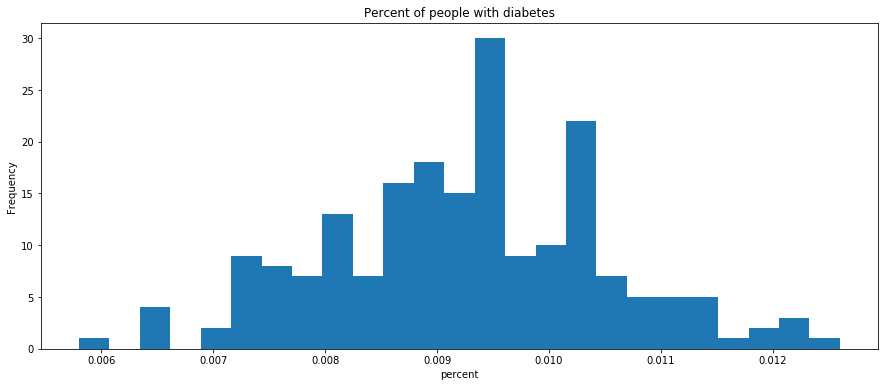

In [20]:
two_value_probabilities = [0.0093, 1-0.0093]
sample_size = 5000
result = np.random.multinomial(sample_size, two_value_probabilities)
samples_list =[]
for times in range(200):
    result = np.random.multinomial(sample_size, two_value_probabilities)
    samples_list.append(result[0]/sample_size)

samples_df = pd.DataFrame(samples_list)
ax = samples_df.plot.hist(bins=25, title = 'Percent of people with diabetes',legend=False, figsize=(15,6))
ax.set_xlabel('percent')

6. Compute the 95% conﬁdence interval of the 200 values in #5

In [25]:
samples_series = pd.Series(samples_df[0])
# lower, mean, upper = confidenceinterval_propotion(samples_series, sample_size,two_value_probabilities[0] )
lower, mean, upper = confidenceinterval_propotion(samples_series, sample_size,two_value_probabilities[0] )
pd.DataFrame([{'Mean': mean, 'Lower':lower, 'Upper':upper }])

,Lower,Mean,Upper
0,0.006597,0.009258,0.011919


7. Is the study representative of the general population? Why or why not?

Ans:
No, it isn't the study representative of general population. We sampled 200 times from the general population, and we can believe that the general population mean lies between these two bounds of 0.65% and 1.19% since 95% confidence intervals contain the true mean. Since, 2.7% isn't in the range of those two proportion, we reject the H0 and accept H1.

In the ﬁle framingham.csv the column TOTCHOL gives the total cholesterol of each person in the study. The column ANYCHD indicates if the person has any heart disease.

8. Plot the cholesterol values for the people with heart disease, for the people with out heart disease.

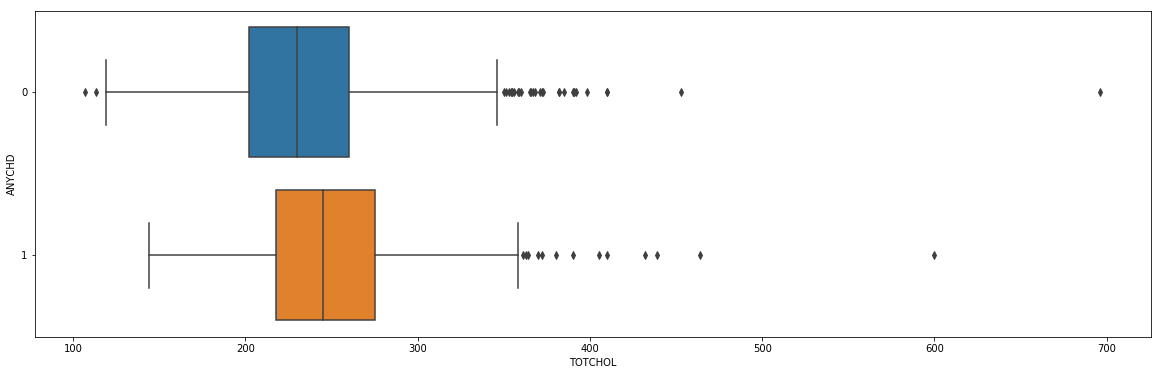

In [22]:
totchol_df = framingham_df[ ['TOTCHOL', 'ANYCHD']]
# totchol_df

with_heart_disease = totchol_df.loc[totchol_df['ANYCHD'] == 1] 
without_heart_disease = totchol_df.loc[totchol_df['ANYCHD'] == 0] 
without_heart_disease

all_df2 = pd.concat([without_heart_disease,with_heart_disease])
# all_df2
plt.figure(figsize=(20,6))                           # x axis = 20, y axis = 6
sns.boxplot(x='TOTCHOL', y='ANYCHD',data= all_df2,orient='h')

9. Compute the 95% conﬁdence interval of the cholesterol values for the people with heart disease, for the people with out heart disease.

In [23]:
with_heart_disease_series = pd.Series(with_heart_disease['TOTCHOL'])

lower, mean, upper = confidence_interval(with_heart_disease_series, with_heart_disease_series.count())
print('With heat disease')
print(pd.DataFrame([{'Mean': mean, 'Lower':lower, 'Upper':upper }]))


without_heart_disease_series = pd.Series(without_heart_disease['TOTCHOL'])
lower, mean, upper = confidence_interval(without_heart_disease_series, without_heart_disease_series.count())
print('\nWithout heat disease')
print(pd.DataFrame([{'Mean': mean, 'Lower':lower, 'Upper':upper }]))

With heat disease
        Lower       Mean       Upper
0  246.540312  249.48218  252.424048

Without heat disease
        Lower       Mean       Upper
0  231.259835  232.84626  234.432686


10.What can we deduce about cholesterol values and heart disease?

Ans:
We have 95% confidence that the average of cholesterol of people with heart disease lies between 246.54 to 252.42. Also, we have 95% confidence that the average of cholesterol of people "without" heart disease lies between 231.26 to 234.43 Consequencently, we can deduce that the people with heart disease have higher cholesterol than the people without heart disease.